In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("final_combined_enriched_v4.csv")
df.head()

,tweet,type
0,This cartoon by Alok @caricatured speak about...,1
1,I am going to post one #BernieAtTheFarmersProt...,1
2,@sardesairajdeep @OfficialUrmila @RahulGandhi ...,1
3,Oooh... that`s right by the zoo... think... i...,0
4,@vivekoberoi @narendramodi @OmungKumar @suresh...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50169 entries, 0 to 50168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   50169 non-null  object
 1   type    50169 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 784.0+ KB


In [4]:
df.isnull().sum()

tweet    0
type     0
dtype: int64

In [5]:
print(df.duplicated().sum())
print(df['tweet'].str.strip().eq('').sum())
print(df['tweet'].str.contains("http").mean())

135
0
0.18696804799776753


In [6]:
df = df.drop_duplicates(keep="first")

# Understanding Tweet Behavior

In [7]:
df['type'].value_counts()

type
1    27324
0    22710
Name: count, dtype: int64

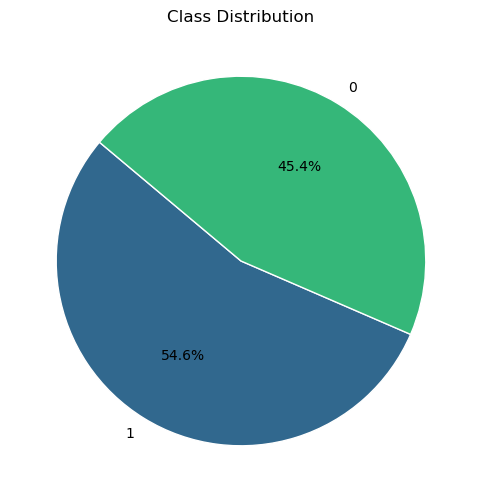

In [8]:
class_counts = df['type'].value_counts()

colors = sns.color_palette("viridis", len(class_counts))

plt.figure(figsize=(6,6))
plt.pie(
    class_counts,
    labels=class_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)

plt.title("Class Distribution")
plt.show()

In [9]:
df['char_len'] = df['tweet'].str.len()
df['word_len'] = df['tweet'].str.split().apply(len)

In [10]:
df.head(3)

,tweet,type,char_len,word_len
0,This cartoon by Alok @caricatured speak about...,1,191,32
1,I am going to post one #BernieAtTheFarmersProt...,1,288,36
2,@sardesairajdeep @OfficialUrmila @RahulGandhi ...,1,249,25


C:\Users\Vinay Verma\AppData\Local\Temp\ipykernel_10484\2957809550.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Vinay Verma\AppData\Local\Temp\ipykernel_10484\2957809550.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


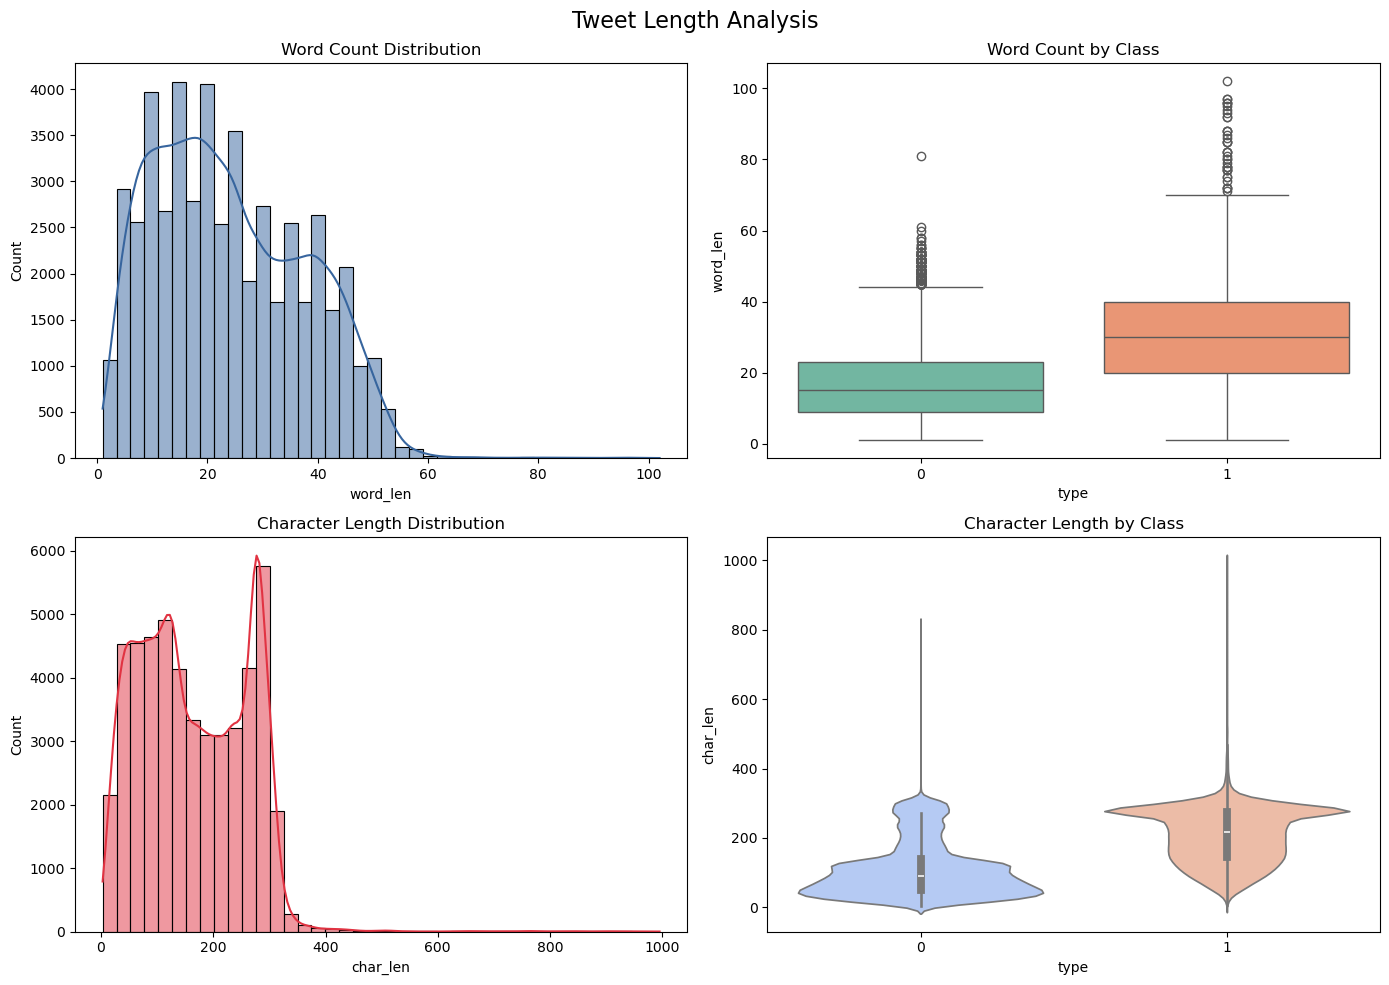

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))
fig.suptitle("Tweet Length Analysis", fontsize=16)

sns.histplot(
    df['word_len'],
    bins=40,
    kde=True,
    ax=axes[0,0],
    color=sns.color_palette("mako")[2]
)
axes[0,0].set_title("Word Count Distribution")

sns.boxplot(
    x='type',
    y='word_len',
    data=df,
    ax=axes[0,1],
    palette="Set2"
)
axes[0,1].set_title("Word Count by Class")

sns.histplot(
    df['char_len'],
    bins=40,
    kde=True,
    ax=axes[1,0],
    color=sns.color_palette("rocket")[3]
)
axes[1,0].set_title("Character Length Distribution")

sns.violinplot(
    x='type',
    y='char_len',
    data=df,
    ax=axes[1,1],
    palette="coolwarm"
)
axes[1,1].set_title("Character Length by Class")

plt.tight_layout()
plt.show()


In [12]:
from collections import Counter

all_words = " ".join(df['tweet']).lower().split()
Counter(all_words).most_common(20)

[('the', 28667),
 ('to', 25821),
 ('of', 19593),
 ('in', 18719),
 ('and', 16766),
 ('is', 16600),
 ('a', 14896),
 ('for', 12292),
 ('@rahulgandhi', 11640),
 ('i', 11005),
 ('you', 9144),
 ('#india', 8844),
 ('on', 7518),
 ('indian', 6660),
 ('#loksabhaelections2019', 6426),
 ('are', 6005),
 ('will', 6003),
 ('this', 5878),
 ('that', 5722),
 ('with', 5659)]

In [13]:
for t in df['type'].unique():
    words = " ".join(df[df['type'] == t]['tweet']).lower().split()
    print(f"\nType {t}:")
    print(Counter(words).most_common(10))


Type 1:
[('the', 19183), ('to', 17396), ('of', 15029), ('in', 13550), ('is', 13128), ('and', 11963), ('@rahulgandhi', 11637), ('a', 9451), ('for', 8650), ('#loksabhaelections2019', 6426)]

Type 0:
[('the', 9484), ('to', 8425), ('i', 7347), ('#india', 6984), ('a', 5445), ('in', 5169), ('and', 4803), ('of', 4564), ('for', 3642), ('is', 3472)]


In [15]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

clean_words = [w for w in all_words if w.isalpha() and w not in stop_words]

Counter(clean_words).most_common(20)

[nltk_data] Downloading package stopwords to C:\Users\Vinay
[nltk_data]     Verma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('indian', 6660),
 ('politics', 3897),
 ('india', 3461),
 ('rahul', 3374),
 ('gandhi', 3277),
 ('modi', 3166),
 ('like', 2683),
 ('pm', 2327),
 ('people', 2162),
 ('one', 2126),
 ('u', 2053),
 ('congress', 2046),
 ('get', 1867),
 ('bjp', 1774),
 ('time', 1556),
 ('good', 1480),
 ('day', 1466),
 ('know', 1432),
 ('want', 1402),
 ('vote', 1374)]

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,2), max_features=20)
X = vectorizer.fit_transform(df['tweet'])

bigram_freq = (
    pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    .sum()
    .sort_values(ascending=False))

bigram_freq

https co                10173
indian politics          3113
in the                   2342
rahul gandhi             2091
of the                   2078
in india                 1503
to be                    1371
in indian                1324
for the                  1307
will be                  1241
of india                 1174
india https              1162
is the                   1158
to the                   1148
of indian                1041
this is                  1027
on the                   1014
incindia rahulgandhi     1000
he is                     958
you are                   936
dtype: int64

In [17]:
df['has_url'] = df['tweet'].str.contains("http").astype(int)
df['has_mention'] = df['tweet'].str.contains("@").astype(int)
df['has_hashtag'] = df['tweet'].str.contains("#").astype(int)

df['caps_ratio'] = df['tweet'].apply(lambda x: sum(c.isupper() for c in x) / max(len(x), 1))

In [18]:
df.head(3)

,tweet,type,char_len,word_len,has_url,has_mention,has_hashtag,caps_ratio
0,This cartoon by Alok @caricatured speak about...,1,191,32,0,1,0,0.041885
1,I am going to post one #BernieAtTheFarmersProt...,1,288,36,1,1,1,0.097222
2,@sardesairajdeep @OfficialUrmila @RahulGandhi ...,1,249,25,0,1,1,0.092369


C:\Users\Vinay Verma\AppData\Local\Temp\ipykernel_10484\935077229.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Vinay Verma\AppData\Local\Temp\ipykernel_10484\935077229.py:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(
C:\Users\Vinay Verma\AppData\Local\Temp\ipykernel_10484\935077229.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Vinay Verma\AppData\Local\Temp\ipykernel_10484\935077229.py:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(
C:\Users\Vinay Verma\AppData\Local\Temp\ipykernel_10484\935077229.py:9: FutureWarning: 


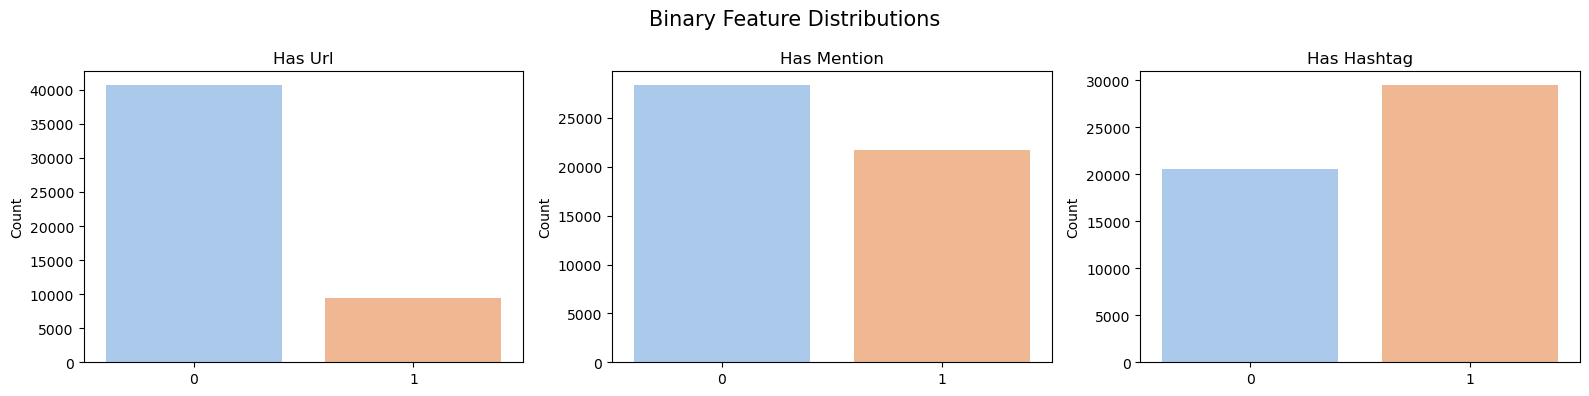

In [19]:
binary_features = ['has_url', 'has_mention', 'has_hashtag']

fig, axes = plt.subplots(1, 3, figsize=(16,4))
fig.suptitle("Binary Feature Distributions", fontsize=15)

palette = sns.color_palette("pastel")

for i, feature in enumerate(binary_features):
    sns.countplot(
        x=feature,
        data=df,
        ax=axes[i],
        palette=palette
    )
    axes[i].set_title(feature.replace("_", " ").title())
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Model & Performance Metrics
Training, Evaluation  and Classification Results

In [21]:
X_text = df['tweet']
X_extra = df[['has_url', 'has_mention', 'has_hashtag', 'caps_ratio']]
y = df['type']

In [22]:
from sklearn.model_selection import train_test_split

X_text_train, X_text_test, X_extra_train, X_extra_test, y_train, y_test = train_test_split(X_text, X_extra, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    stop_words='english'
)

X_text_train_tfidf = tfidf.fit_transform(X_text_train)
X_text_test_tfidf = tfidf.transform(X_text_test)

In [24]:
from scipy.sparse import hstack

X_train = hstack([X_text_train_tfidf, X_extra_train.values])
X_test = hstack([X_text_test_tfidf, X_extra_test.values])

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.9778155291296092
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      4537
           1       0.99      0.97      0.98      5470

    accuracy                           0.98     10007
   macro avg       0.98      0.98      0.98     10007
weighted avg       0.98      0.98      0.98     10007



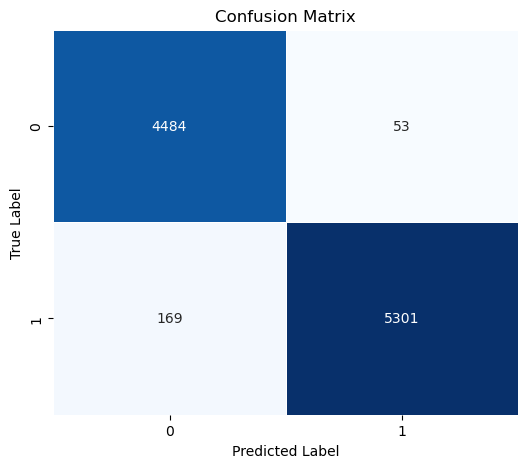

In [27]:
plt.figure(figsize=(6,5))

sns.heatmap(
    confusion_matrix(y_test,y_pred),
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    linewidths=0.6,
    linecolor="white"
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.show()